In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\Dharani\Downloads\data-transport.csv")

In [4]:
data.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [5]:
data.tail()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
1913,19/01/2023,11337,8671,262,14881,0,66.0
1914,16/08/2023,16791,11800,387,20936,4684,113.0
1915,10/01/2022,5732,3548,73,6644,0,25.0
1916,04/05/2020,3717,1952,70,4411,131,19.0
1917,26/07/2023,16680,11726,347,20438,4738,99.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [7]:
data.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [8]:
print(data.isnull().sum())

Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


In [10]:
data.dropna(subset=['Other'], inplace=True)

In [12]:
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\Dharani\AppData\Local\Temp\ipykernel_10904\1453708669.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1918 non-null   datetime64[ns]
 1   Local Route   1918 non-null   int64         
 2   Light Rail    1918 non-null   int64         
 3   Peak Service  1918 non-null   int64         
 4   Rapid Route   1918 non-null   int64         
 5   School        1918 non-null   int64         
 6   Other         1918 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 105.0 KB


In [14]:
data['Total_Patronage'] = (
    data['Local Route'] +
    data['Light Rail'] +
    data['Peak Service'] +
    data['Rapid Route'] +
    data['School'] +
    data['Other']
)

In [15]:
data.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Total_Patronage
0,2024-08-30,16436,10705,225,19026,3925,59.0,50376.0
1,2023-09-15,15499,10671,267,18421,4519,61.0,49438.0
2,2021-12-28,1756,2352,0,3775,0,13.0,7896.0
3,2023-01-11,10536,8347,223,14072,0,48.0,33226.0
4,2021-09-11,820,612,0,1283,0,11.0,2726.0


<Axes: xlabel='Date'>

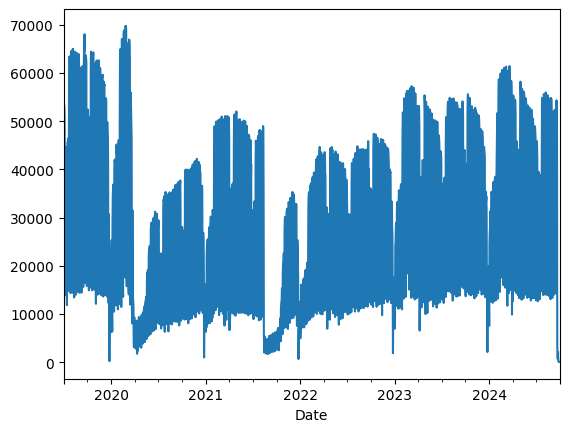

In [16]:
data.groupby('Date')['Total_Patronage'].sum().plot(kind='line')

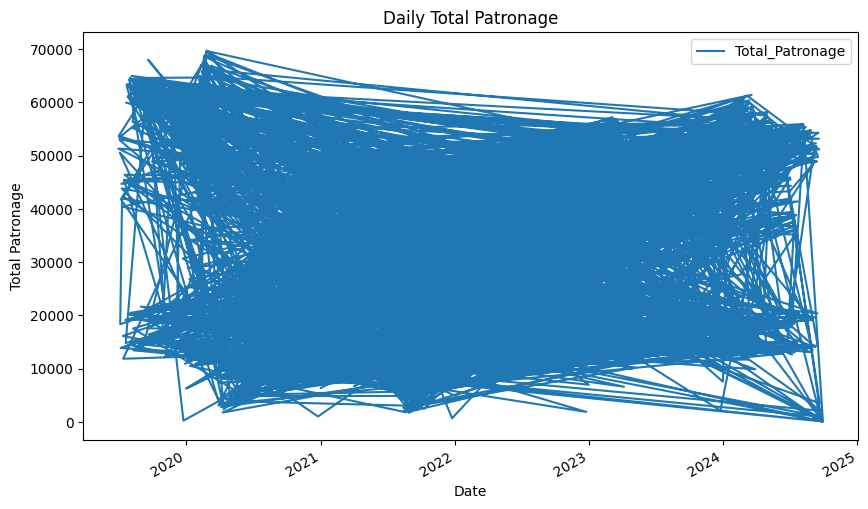

In [18]:
#DAILY TOTAL PATRONAGE OVER YEARS
import matplotlib.pyplot as plt

data.plot(x='Date', y='Total_Patronage', kind='line', title='Daily Total Patronage', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Total Patronage')
plt.show()


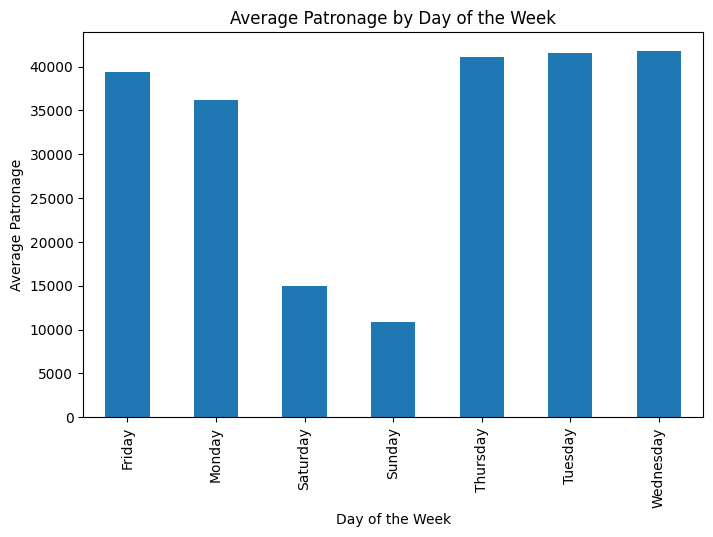

In [19]:
data['Day_of_Week'] = data['Date'].dt.day_name()
daily_avg = data.groupby('Day_of_Week')['Total_Patronage'].mean()

daily_avg.plot(kind='bar', title='Average Patronage by Day of the Week', figsize=(8, 5))
plt.xlabel('Day of the Week')
plt.ylabel('Average Patronage')
plt.show()

In [26]:
data['Is_Weekend'] = data['Day_of_Week'].isin(['Saturday', 'Sunday'])

weekend_avg = data[data['Is_Weekend']].groupby('Date')['Total_Patronage'].mean()
weekday_avg = data[~data['Is_Weekend']].groupby('Date')['Total_Patronage'].mean()

print("Average Weekend Patronage:", weekend_avg.mean())
print("Average Weekday Patronage:", weekday_avg.mean())

Average Weekend Patronage: 12892.043795620439
Average Weekday Patronage: 40006.74306569343


C:\Users\Dharani\AppData\Local\Temp\ipykernel_10904\3419078706.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M', on='Date')['Total_Patronage'].sum()


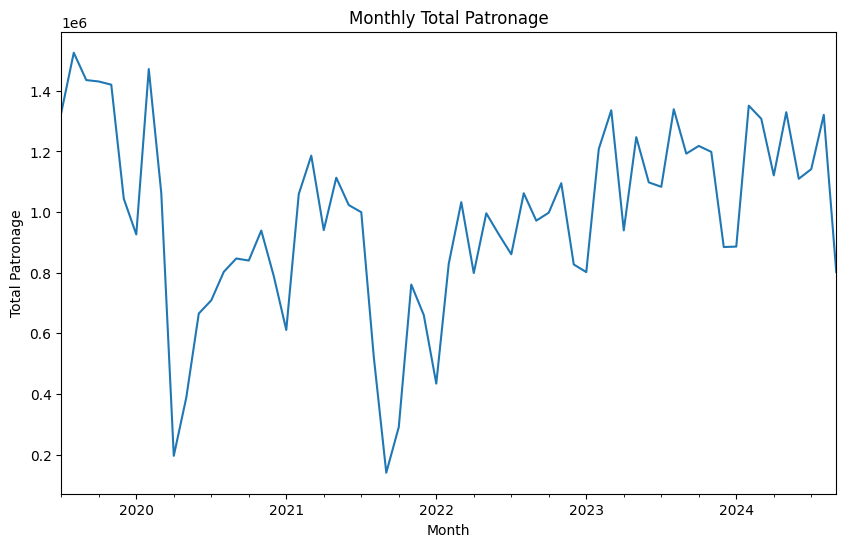

In [20]:
weekly_data = data.resample('W', on='Date')['Total_Patronage'].sum()
monthly_data = data.resample('M', on='Date')['Total_Patronage'].sum()

monthly_data.plot(kind='line', title='Monthly Total Patronage', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Total Patronage')
plt.show()


In [21]:
max_month = monthly_data.idxmax()
max_value = monthly_data.max()  
print(f"Month with highest patronage: {max_month} ({max_value})")

Month with highest patronage: 2019-08-31 00:00:00 (1525440.0)


In [22]:
min_month = monthly_data.idxmin()  
min_value = monthly_data.min() 
print(f"Month with lowest patronage: {min_month} ({min_value})")

Month with lowest patronage: 2021-09-30 00:00:00 (140306.0)


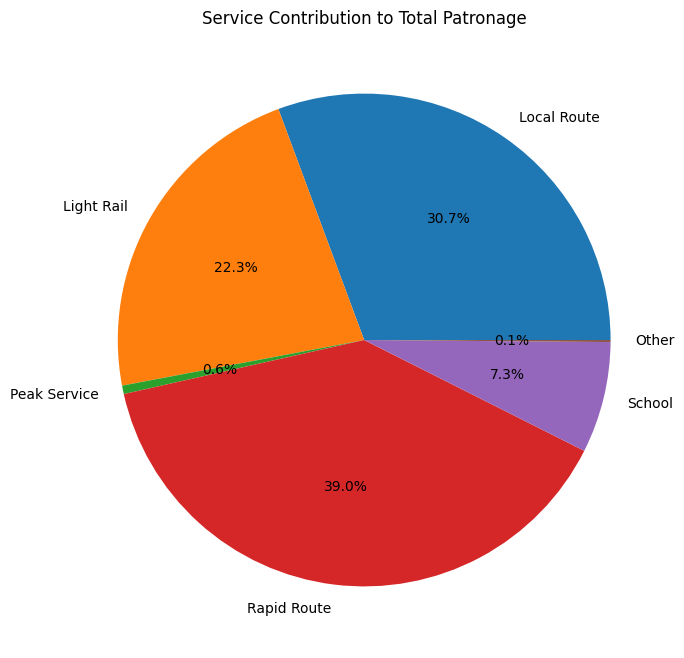

In [24]:
services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
service_totals = data[services].sum()

service_totals.plot(kind='pie', title='Service Contribution to Total Patronage', autopct='%1.1f%%', figsize=(8, 8))
plt.ylabel('')
plt.show()


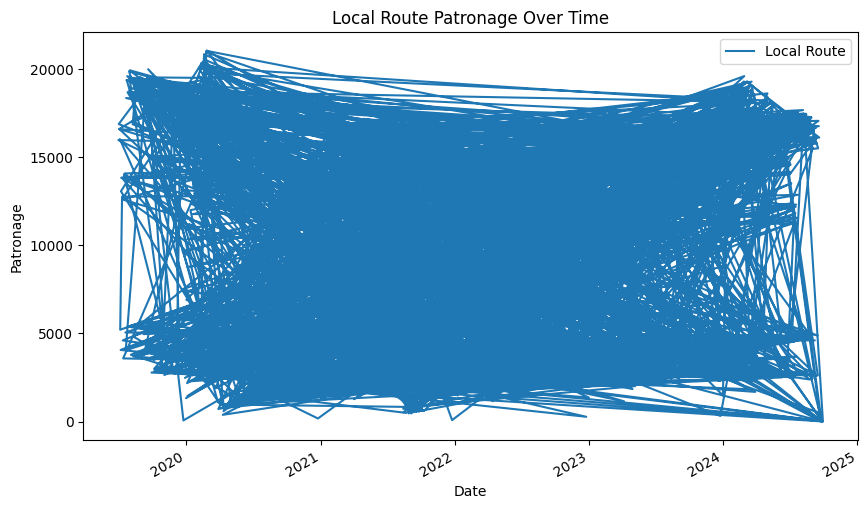

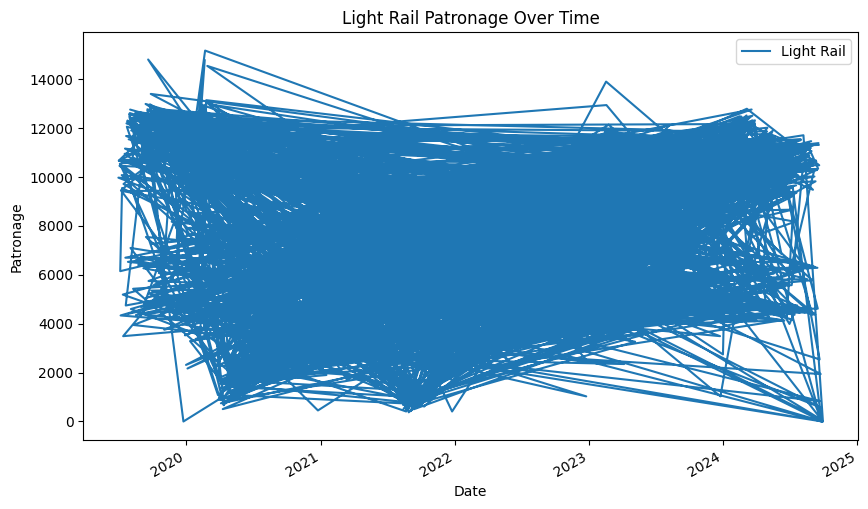

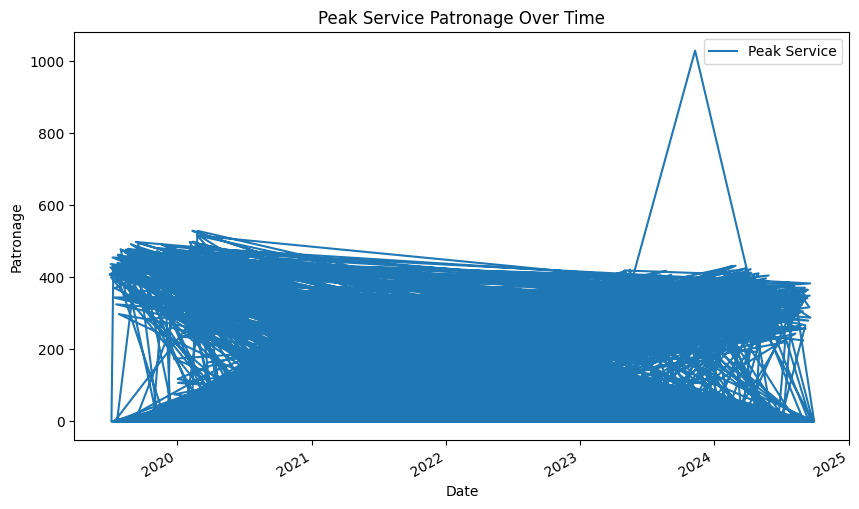

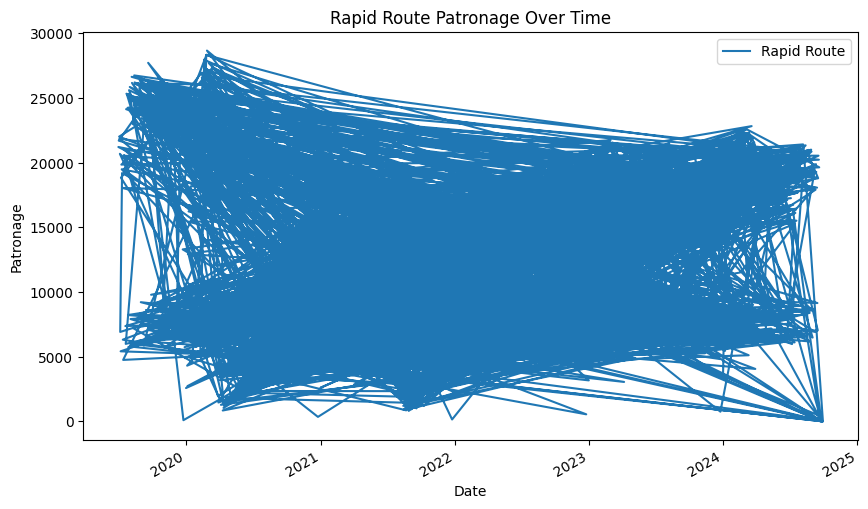

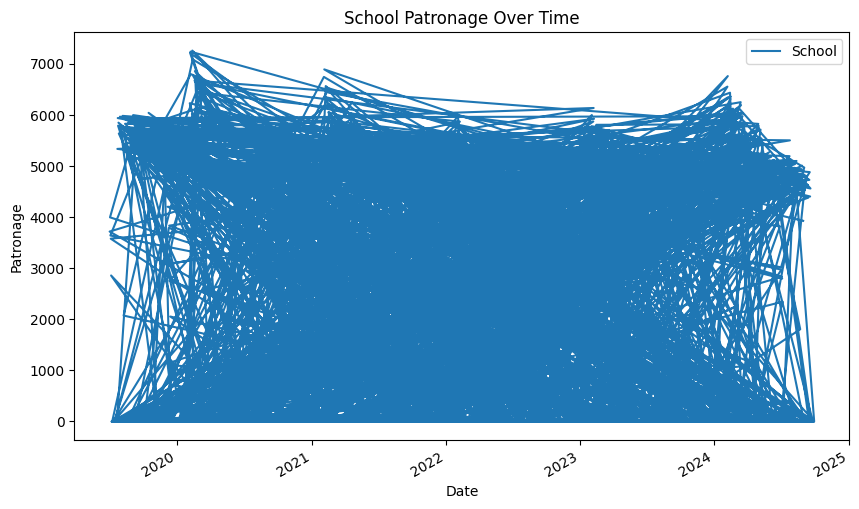

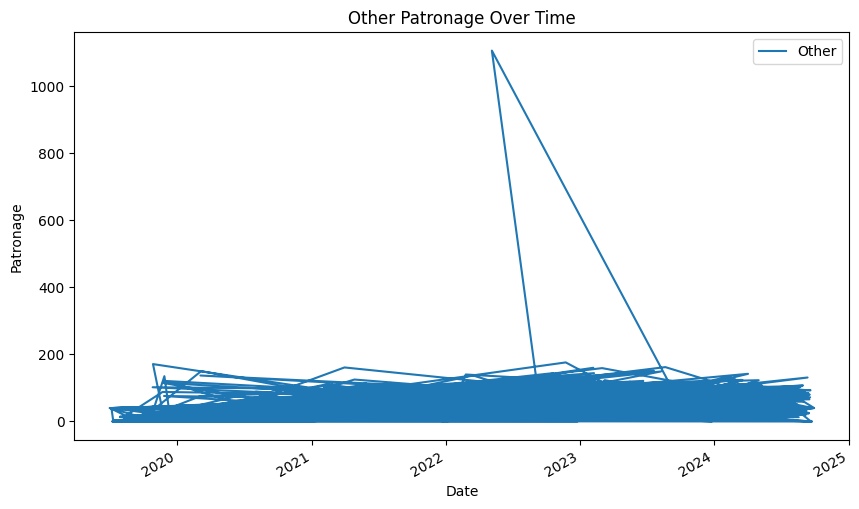

In [27]:
for service in services:
    data.plot(x='Date', y=service, kind='line', title=f'{service} Patronage Over Time', figsize=(10, 6))
    plt.xlabel('Date')
    plt.ylabel('Patronage')
    plt.show()


In [28]:
service_share = data[services].sum() / data['Total_Patronage'].sum() * 100
print(service_share)

Local Route     30.661784
Light Rail      22.304762
Peak Service     0.556674
Rapid Route     39.049398
School           7.292988
Other            0.134394
dtype: float64


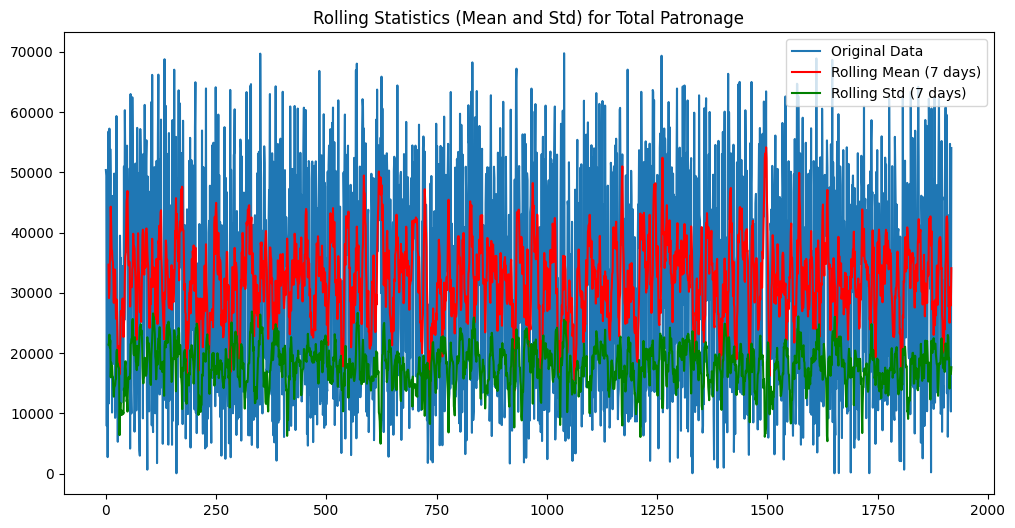

In [34]:
# Plot rolling mean and standard deviation
rolling_mean = data['Total_Patronage'].rolling(window=7).mean()
rolling_std = data['Total_Patronage'].rolling(window=7).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Total_Patronage'], label='Original Data')
plt.plot(rolling_mean, color='red', label='Rolling Mean (7 days)')
plt.plot(rolling_std, color='green', label='Rolling Std (7 days)')
plt.legend(loc='best')
plt.title('Rolling Statistics (Mean and Std) for Total Patronage')
plt.show()


In [35]:
pip install statsmodels


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 825.8 kB/s eta 0:00:12
   --- ------------------------------------ 0.9/9.9 MB 2.2 MB/s eta 0:00:05
   ---- ----------------------------------- 1.1/9.9 MB 2.6 MB/s eta 0:00:04
   ----- ---------------------------------- 1.4/9.9 MB 3.0 MB/s eta 0:00:03
   ------- -------------------------------- 1.9/9.9 MB 3.6 MB/s eta 0:00:03
   -------- ------------------------------- 2.0/9.9 MB 3.6 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.9 MB 3.6 MB/s eta 0:00:03
   --------- ------------------------------ 2.3/9.9 MB 3.5 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.9 MB 3.5 MB/s eta 0:00:03
   ---------- ----------------------------- 2.5/9.9 MB 3.4 MB/s eta 0:00:03
   ---------- ----------------------------- 2.7/9.9 MB 3.4 MB/s eta 0:00:03
   ------------ -------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Dharani\myenvvv\Scripts\python.exe -m pip install --upgrade pip


In [ ]:
#FORECASTING

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [37]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [40]:
print(data.columns)

Index(['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School',
       'Other', 'Total_Patronage', 'Day_of_Week', 'Is_Weekend'],
      dtype='object')


In [43]:
import pandas as pd

start_date = '2020-01-01'

date_range = pd.date_range(start=start_date, periods=len(data), freq='D')

data['Date'] = date_range

data.set_index('Date', inplace=True)

print(data.head())  

            Local Route  Light Rail  Peak Service  Rapid Route  School  Other  \
Date                                                                            
2020-01-01        16436       10705           225        19026    3925   59.0   
2020-01-02        15499       10671           267        18421    4519   61.0   
2020-01-03         1756        2352             0         3775       0   13.0   
2020-01-04        10536        8347           223        14072       0   48.0   
2020-01-05          820         612             0         1283       0   11.0   

            Total_Patronage Day_of_Week  Is_Weekend  
Date                                                 
2020-01-01          50376.0      Friday       False  
2020-01-02          49438.0      Friday       False  
2020-01-03           7896.0     Tuesday       False  
2020-01-04          33226.0   Wednesday       False  
2020-01-05           2726.0    Saturday        True  


C:\Users\Dharani\myenvvv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dharani\myenvvv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


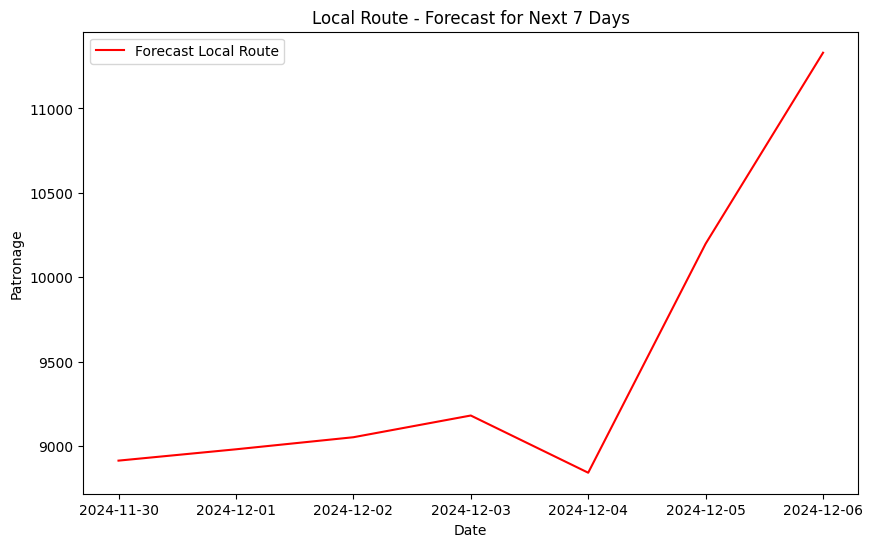

Forecast for Local Route from 2024-11-30 to 2024-12-06:
2024-11-30: 8913.823101387792
2024-12-01: 8980.931238103165
2024-12-02: 9052.388279676992
2024-12-03: 9181.088280103202
2024-12-04: 8842.172492075539
2024-12-05: 10198.787927451729
2024-12-06: 11330.37268748503




C:\Users\Dharani\myenvvv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dharani\myenvvv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


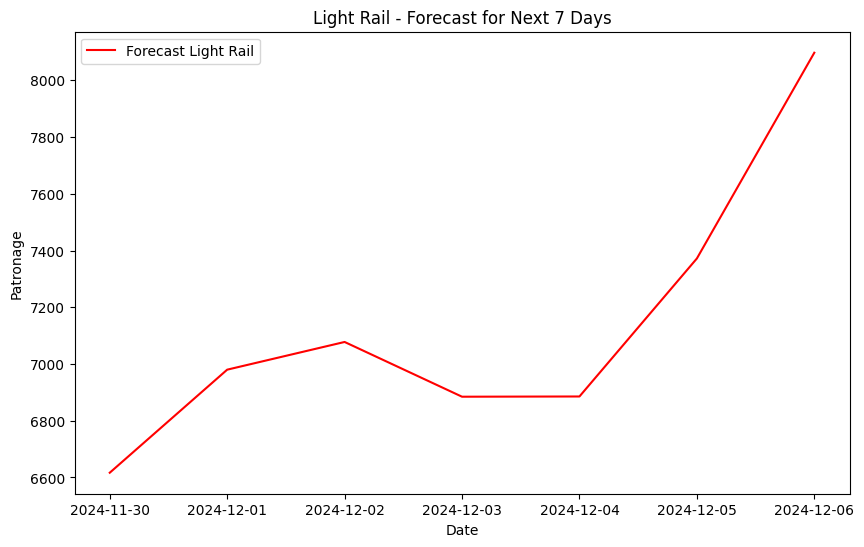

Forecast for Light Rail from 2024-11-30 to 2024-12-06:
2024-11-30: 6616.589815761394
2024-12-01: 6979.900796740908
2024-12-02: 7077.569082076745
2024-12-03: 6884.5744981186435
2024-12-04: 6885.372587071171
2024-12-05: 7371.889496311691
2024-12-06: 8097.313934335671




C:\Users\Dharani\myenvvv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dharani\myenvvv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


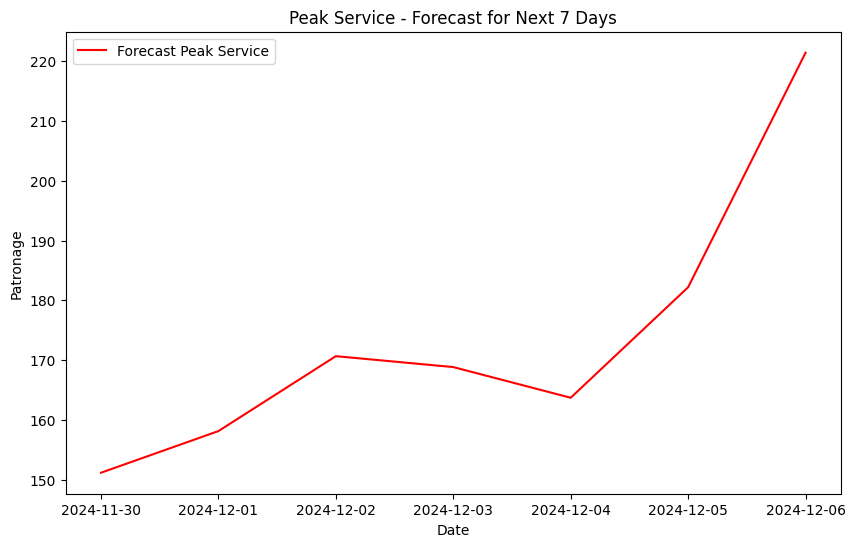

Forecast for Peak Service from 2024-11-30 to 2024-12-06:
2024-11-30: 151.15644018908884
2024-12-01: 158.12320036527143
2024-12-02: 170.65917047305916
2024-12-03: 168.83418232419623
2024-12-04: 163.70007964017407
2024-12-05: 182.19240370199367
2024-12-06: 221.4338558346388




C:\Users\Dharani\myenvvv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dharani\myenvvv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


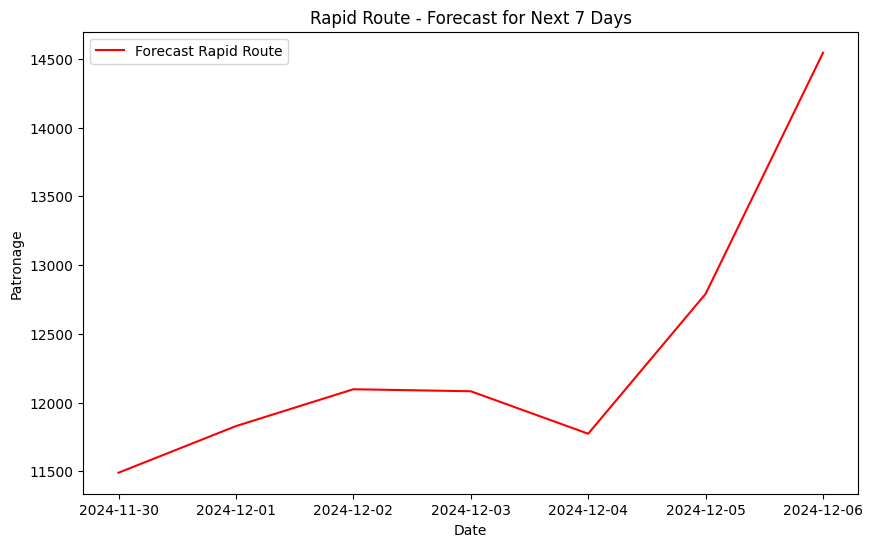

Forecast for Rapid Route from 2024-11-30 to 2024-12-06:
2024-11-30: 11489.171361779736
2024-12-01: 11828.34945693186
2024-12-02: 12096.502827257451
2024-12-03: 12081.919554575961
2024-12-04: 11772.87270378058
2024-12-05: 12790.77458765642
2024-12-06: 14544.870495499052




C:\Users\Dharani\myenvvv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dharani\myenvvv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


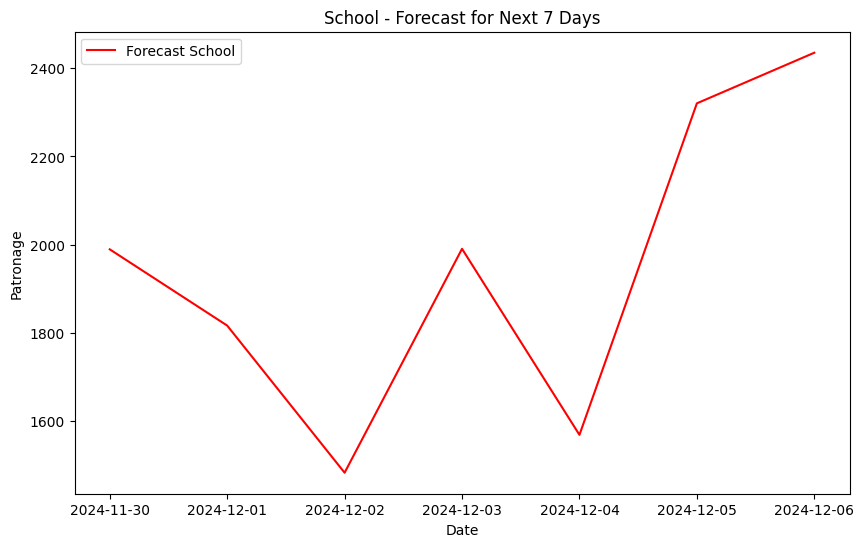

Forecast for School from 2024-11-30 to 2024-12-06:
2024-11-30: 1989.0790931829165
2024-12-01: 1815.9619636133018
2024-12-02: 1481.7958443720956
2024-12-03: 1990.2695391047819
2024-12-04: 1567.8005911239002
2024-12-05: 2320.636375896087
2024-12-06: 2435.570946820127




In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import pandas as pd

services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

forecast_days = 7

forecast_start_date = '2024-11-30'

for service in services:
    model = ExponentialSmoothing(data[service], trend='add', seasonal='add', seasonal_periods=7)
    model_fitted = model.fit()

    forecast = model_fitted.forecast(forecast_days)

    forecast_dates = pd.date_range(forecast_start_date, periods=forecast_days, freq='D')

    plt.figure(figsize=(10, 6))
    plt.plot(forecast_dates, forecast, label=f'Forecast {service}', color='red')
    plt.title(f'{service} - Forecast for Next 7 Days')
    plt.xlabel('Date')
    plt.ylabel('Patronage')
    plt.legend()
    plt.show()

    print(f"Forecast for {service} from {forecast_start_date} to {forecast_dates[-1].strftime('%Y-%m-%d')}:")
    for date, value in zip(forecast_dates, forecast):
        print(f"{date.strftime('%Y-%m-%d')}: {value}")
    print("\n")
